## Métodos de Otimização: Métodos de procura multidimensional

### Steepest Descent - Diferenças finitas

__Imports:__

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os

__Função Avaliada:__

In [2]:
x=np.zeros(2 , dtype = 'float')
G =np.zeros(2 , dtype = 'float')

def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

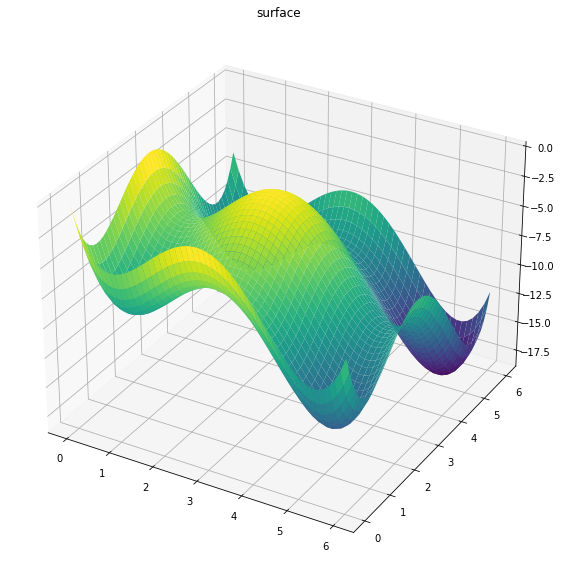

In [4]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

__Método:__

In [5]:
def grad(x):
    epsilon = 1.e-10
    
    xtmp=x.copy()
    xtmp[0]=xtmp[0]+epsilon
    G[0]=(f(xtmp)-f(x))/epsilon

    xtmp=x.copy()
    xtmp[1]=xtmp[1]+epsilon
    G[1]=(f(xtmp)-f(x))/epsilon
    
    return G

In [6]:
xold =np.zeros(2 , dtype = 'float')
xnew =np.zeros(2 , dtype = 'float')
alfa=0.1; kmax=20; k=0
xold[0]=3; xold[1]=3; F0 = f(xold)
layout = "{0:.5f}"
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    G = grad(xold)
    
    # Processo iterativo
    xnew=xold-alfa*G
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F = f(xnew)
    print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))

3.00000 3.00000 -1.50000
3.09999 3.09999 -1.74992
3.24990 3.24990 -2.31010
3.47330 3.47329 -3.54154
3.79934 3.79929 -6.08905
4.24796 4.24792 -10.56997
4.77756 4.77762 -15.86205
5.20456 5.20462 -18.39941
5.33536 5.33542 -18.56770
5.32946 5.32932 -18.56802
5.33006 5.33012 -18.56802
5.33026 5.33012 -18.56802
5.33016 5.33002 -18.56802
5.32986 5.33002 -18.56802
5.33006 5.33002 -18.56802
5.33006 5.33012 -18.56802
5.33006 5.33002 -18.56802
5.33006 5.33012 -18.56802
5.33006 5.33002 -18.56802
5.33006 5.33012 -18.56802
5.33006 5.33002 -18.56802


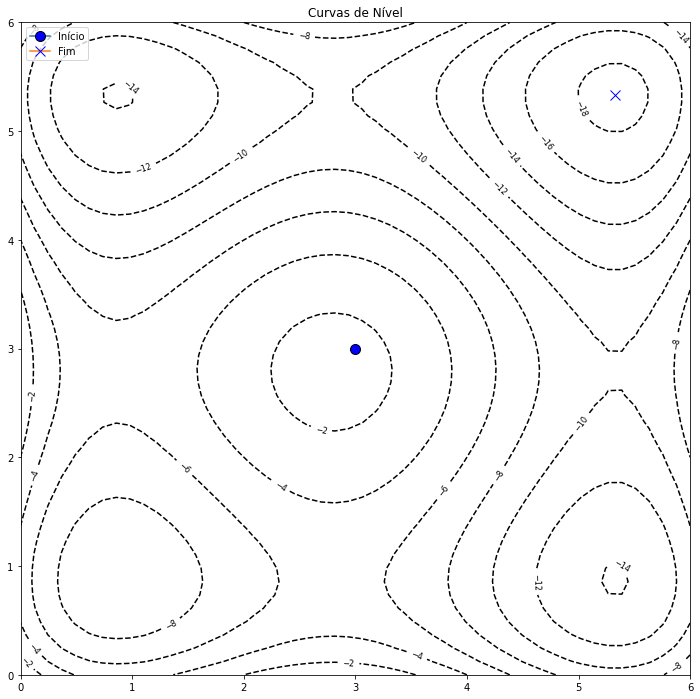

In [7]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(3, 3, marker="o", markersize=10, markeredgecolor="k", markerfacecolor="b")
plt.plot(xnew[0], xnew[1], marker="x", markersize=10, markeredgecolor="b", markerfacecolor="b")
plt.legend(['Início', 'Fim'], loc='upper left')
plt.show()